# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

*   Splits the data recursively using observations to
predict outcomes for future cases and possibilities of inputs. Decision nodes are the decision points, edges are the lines connecting each decision nodes as choices are made and terminal nodes are the final outcome

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

*  Decision trees split data based on the possible responses to narrow down the final outcome, such as size-->color-->shape-->result. This hierarchy relationship allows nonlinear relationships to be displayed more effectively. With linear models, the results are formed from the basis that there IS linear relationship, or some sort of line of best fit that can be formed based on the data by expanding polynomial terms and forming interactions, which isn't always the case or doesn't truly display the relationship effectively.

3. Why is the Gini a good loss function for categorical target variables?
* Gini measures the "purity" of a node. In other words, the less different answer there are conflicting with the node, the more pure it is and gini will be closer to 0. For example a color node red is perfectly pure if there are no other colors and thus the conclusion will always be red. This si a good loss function for categorical target variables because it measures how accurate the classifications are based on the training data. It also provides insight for the best ways to split the features.

4. Why do trees tend to overfit, and how can this tendency be constrained?
* Trees tend to overfit because the decision nodes are highly dependent on the direct results of the training data. Data may not capture all possible results and as such, if used for other data, the missing possible values will be completely absent in predictions.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.
* False. Trees are capable of performing well with less categorical variables or even numerical variables as a metric of comparison, like age or income.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
* Binary split is much simpler, low-cost, efficient to create and avoids overfitting much better.

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?
* Checking accuracy with a test set, how many levels a tree has, if there's too many/too few nodes, nodes with small smamples, inability to capture patterns on either set, etc.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

cancer=pd.read_csv('https://raw.githubusercontent.com/jac7az/trees/refs/heads/main/assignment/data/Breast%20Cancer%20METABRIC.csv')
cancer

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,70.05,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,NaN,NaN,NaN,4.93,Recurred,Female,NaN,27.0,1.0,NaN
2505,MTS-T2429,63.60,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,NaN,NaN,NaN,16.18,Recurred,Female,NaN,28.0,2.0,NaN
2506,MTS-T2430,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN
2507,MTS-T2431,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN


In [44]:
cancer.head(100)
#2508 observations with 34 variables

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,MB-0168,60.26,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,Low,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,121.15,Not Recurred,Female,ER+/HER2- Low Prolif,17.0,1.0,Living
96,MB-0169,79.28,Breast Conserving,Breast Cancer,Breast Invasive Lobular Carcinoma,Low,No,Normal,1.0,Positve,...,Deceased,Positive,No,143.52,Not Recurred,Female,ER+/HER2- Low Prolif,39.0,2.0,Died of Other Causes
97,MB-0170,83.35,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,Low,No,LumA,1.0,Positve,...,Deceased,Negative,Yes,92.14,Not Recurred,Female,ER+/HER2- Low Prolif,26.0,2.0,Died of Other Causes
98,MB-0171,64.57,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,No,Normal,1.0,Positve,...,Living,Negative,Yes,5.36,Not Recurred,Female,ER+/HER2- Low Prolif,27.0,2.0,Living


In [45]:
cancerN=cancer[['Tumor Size','Lymph nodes examined positive','Age at Diagnosis']]
cancerC=pd.get_dummies(cancer[['Tumor Stage','Chemotherapy','Cancer Type Detailed']],dtype='int')
X=pd.concat([cancerN,cancerC],axis=1)
X

,Tumor Size,Lymph nodes examined positive,Age at Diagnosis,Tumor Stage,Chemotherapy_No,Chemotherapy_Yes,Cancer Type Detailed_Breast,Cancer Type Detailed_Breast Angiosarcoma,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Cancer Type Detailed_Metaplastic Breast Cancer
0,22.0,10.0,75.65,2.0,1,0,0,0,1,0,0,0,0,0
1,10.0,0.0,43.19,1.0,1,0,0,0,1,0,0,0,0,0
2,15.0,1.0,48.87,2.0,0,1,0,0,1,0,0,0,0,0
3,25.0,3.0,47.68,2.0,0,1,0,0,0,0,0,1,0,0
4,40.0,8.0,76.97,2.0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,27.0,0.0,70.05,1.0,0,0,0,0,0,0,0,0,1,0
2505,28.0,0.0,63.60,2.0,0,0,0,0,0,0,0,0,1,0
2506,NaN,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,0
2507,NaN,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,0


<ipython-input-46-bcedcd43bc76>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Overall Survival Status']=X['Overall Survival Status'].replace({'Deceased': 0, 'Living': 1})
<ipython-input-46-bcedcd43bc76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Overall Survival Status']=X['Overall Survival Status'].replace({'Deceased': 0, 'Living': 1})


np.float64(0.7542857142857143)

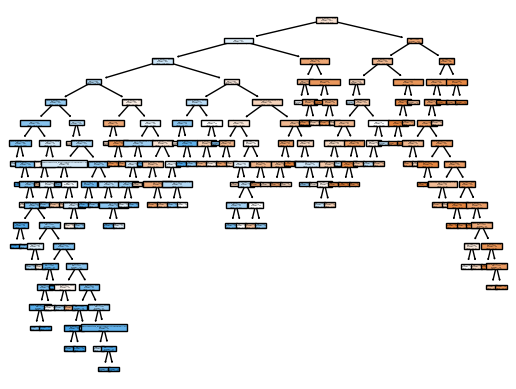

In [46]:
X['Overall Survival Status']=cancer['Overall Survival Status']
X=X.dropna()
X['Overall Survival Status']=X['Overall Survival Status'].replace({'Deceased': 0, 'Living': 1})

pred=tree.DecisionTreeClassifier(min_samples_leaf=10)
pred=pred.fit(X.iloc[:,:-1],X['Overall Survival Status'])

yhat=pred.predict(X.iloc[:,:-1])
plot_tree(pred,feature_names=pred.feature_names_in_,filled=True)
tab=pd.crosstab(X['Overall Survival Status'],yhat)
acc=np.trace(tab)/len(X['Overall Survival Status'])
acc

#Accuracy is 0.754

In [47]:
tn=tab.loc[0,0]
fp=tab.loc[0,1]
fn=tab.loc[1,0]
tp=tab.loc[1,1]
tpr=tp/(tp+fn)
tnr=tn/(tn+fp)

print("TPR:",tpr,'\n',"TNR:",tnr)
#This model performs better with finding deceased results accurately, with 0.859.

TPR: 0.6180327868852459 
 TNR: 0.859493670886076


R2:  0.6857142857142857


<Axes: xlabel='Overall Survival Status', ylabel='Density'>

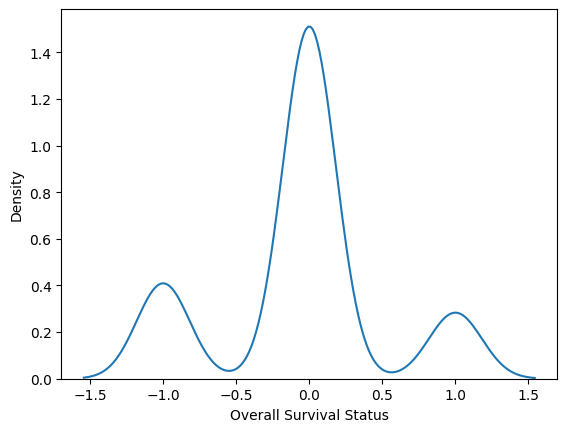

In [48]:
pred=tree.DecisionTreeClassifier(min_samples_leaf=110)
xtrain,xtest,ytrain,ytest=split(X.iloc[:,:-1],X['Overall Survival Status'],test_size=.2,random_state=908)
pred=pred.fit(xtrain,ytrain)
yhat=pred.predict(xtest)
print("R2: ",pred.score(xtest,ytest))
sns.kdeplot(ytest-yhat)

#The R2 value applies to min_samples_leaf=(97,114) at 0.686.

#I feel this model is not accurate enough to be satisfactory under clinical purposes

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [49]:
rate=pd.read_csv('https://raw.githubusercontent.com/jac7az/trees/refs/heads/main/assignment/data/corporate_ratings.csv')
rate.head(100)

#This dataset has 31 variables and 2029 observations

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,B,"Bottomline Technologies, Inc.",EPAY,Egan-Jones Ratings Company,12/3/2014,Technology,2.590317,2.329809,1.546856,74.149941,...,-0.122312,0.757722,1.074252,5.198404,1.807682,-0.056630,26.585254,1.417739,0.173731,8.024811
96,B,"Bottomline Technologies, Inc.",EPAY,Egan-Jones Ratings Company,12/22/2015,Technology,2.153671,1.968471,1.138301,71.855214,...,-1.125521,0.628437,1.042242,3.819182,1.975348,-0.049310,22.940898,1.658467,0.189490,11.996989
97,BBB,Universal Corporation,UVV,Egan-Jones Ratings Company,6/27/2014,Consumer Services,2.804339,1.298654,0.590854,59.567662,...,0.454328,0.868710,8.721173,17.417726,1.832360,0.059339,5.104769,10.039221,0.095246,8.860180
98,BBB,Universal Corporation,UVV,Egan-Jones Ratings Company,12/12/2014,Consumer Services,3.677652,1.514011,0.359429,67.198170,...,0.327431,14.088496,-2.123671,9.502345,1.647698,0.090747,5.124961,-0.150738,-0.001378,9.927522


<Axes: xlabel='Rating', ylabel='Count'>

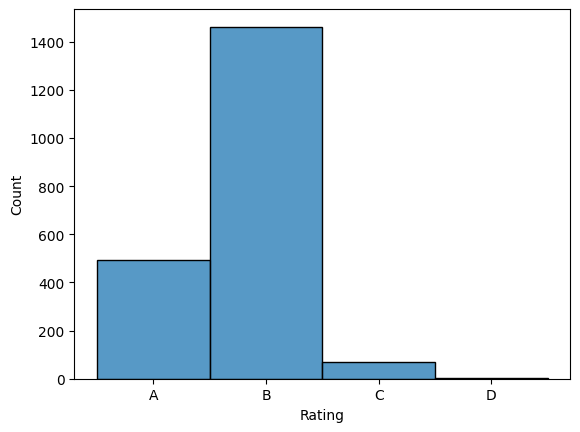

In [50]:
rate['Rating']=rate['Rating'].replace({"AAA":"A","AA":"A","BBB":"B","BB":"B","CCC":"C","CC":"C",'DDD':"D","DD":"D"})
sns.histplot(rate,x='Rating')

In [59]:
X=rate.drop(columns=['Rating','Date','Name','Symbol','Rating Agency Name'])
sector=pd.get_dummies(rate['Sector'],dtype='int')
X=pd.concat([X,sector],axis=1)
xtrain,xtest,ytrain,ytest=split(X,rate['Rating'],test_size=0.2,random_state=934)

# pred=tree.DecisionTreeClassifier(min_samples_leaf=100)
# pred=pred.fit(xtrain,ytrain)

# yp=pred.predict(xtest)
# tab=pd.crosstab(ytest,yp)
# np.trace(tab)/len(ytest)
xtrain

,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Health Care,Miscellaneous,Public Utilities,Technology,Transportation
2017,Consumer Services,1.774738,0.295288,0.295288,0.000000,0.046448,0.075088,0.145054,0.079218,0.075733,...,0,0,1,0,0,0,0,0,0,0
1443,Consumer Non-Durables,2.567806,1.285447,0.595140,21.317701,0.060062,0.091048,0.168980,0.091048,0.111723,...,0,1,0,0,0,0,0,0,0,0
1185,Public Utilities,0.987416,0.887534,0.018089,42.281804,-0.043520,-0.045509,0.828228,0.130321,-0.025957,...,0,0,0,0,0,0,0,1,0,0
1061,Consumer Services,0.435737,0.435737,0.435737,0.000000,0.011540,0.008324,0.790957,0.072456,0.004694,...,0,0,1,0,0,0,0,0,0,0
521,Transportation,1.836663,3.148565,0.631694,0.000000,0.022127,0.034287,1.000000,0.039344,0.028326,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Capital Goods,2.082686,1.625416,0.930633,60.203656,0.092754,0.118564,0.091948,0.118564,0.114485,...,0,0,0,0,0,0,0,0,0,0
423,Health Care,1.570205,0.958978,0.299840,104.092722,0.089890,0.097080,0.447128,0.154932,0.038064,...,0,0,0,0,0,1,0,0,0,0
764,Energy,1.153049,0.676761,0.375522,27.974215,-0.120140,-0.106570,0.293287,0.040712,-0.050887,...,0,0,0,1,0,0,0,0,0,0
694,Technology,1.293951,1.032539,0.513829,66.574913,0.019695,0.023412,0.166146,0.057144,0.014093,...,0,0,0,0,0,0,0,0,1,0


     animal  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0  aardvark     1         0     0     1         0        0         1        1   
1  antelope     1         0     0     1         0        0         0        1   
2      bass     0         0     1     0         0        1         1        1   
3      bear     1         0     0     1         0        0         1        1   
4      boar     1         0     0     1         0        0         1        1   

   backbone  breathes  venomous  fins  legs  tail  domestic  catsize  class  
0         1         1         0     0     4     0         0        1      1  
1         1         1         0     0     4     1         0        1      1  
2         1         0         0     1     0     1         0        0      4  
3         1         1         0     0     4     0         0        1      1  
4         1         1         0     0     4     1         0        1      1  
col_0   1  2  4  6
class             
1      

,class
21,2
46,7
41,2
50,1
42,6
...,...
38,4
14,7
89,5
65,1


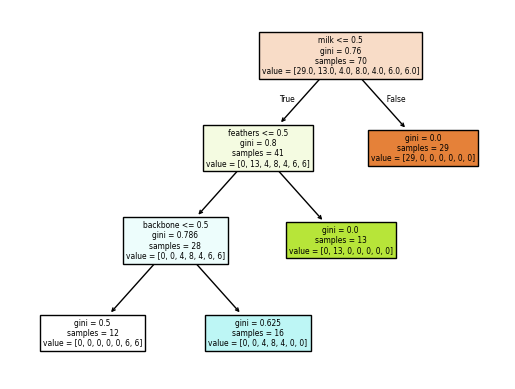

In [58]:

from sklearn.tree import DecisionTreeRegressor # Import the tree classifier
from sklearn.tree import plot_tree # Import the tree classifier
from sklearn.model_selection import train_test_split # Train/test splitter

df = pd.read_csv('https://raw.githubusercontent.com/jac7az/trees/refs/heads/main/data/zoo.csv')
print(df.head())

y = df['class']
X = df.drop(['class','animal'],axis=1)

## Split the Sample into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.3,
                                                    random_state=104)

#cart = tree.DecisionTreeClassifier(random_state=100)
cart = tree.DecisionTreeClassifier(min_samples_leaf=10,random_state=100)

## Confusion Matrix:
cart = cart.fit(X_train, y_train) # Fit the classifier
y_hat = cart.predict(X_test)
print(pd.crosstab(y_test,y_hat))
print('Accuracy  : ', cart.score(X_test, y_test), '\n')

# Visualize results:
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)
y_train

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?